# Light Curve Fitting with ExoCTK
ExoCTK performs light curve fitting with the `ExoCTK.lightcurve_fitting` tool. This notebook will show you how to do it. 

First, some imports and a toy light curve to work with:

In [156]:
# Imports
import numpy as np
from ExoCTK.lightcurve_fitting.lightcurve import LightCurve
from ExoCTK.lightcurve_fitting.parameters import Parameters
from ExoCTK.lightcurve_fitting.models import Model, PolynomialModel
%matplotlib inline

In [157]:
# Toy data
time = np.arange(100)
raw_flux = [0.9 if 25<i<75 else 1 for i in range(100)]
flux = np.random.normal(raw_flux, scale=0.01)
unc = np.random.normal(size=100, scale=0.01)

## Create a Light Curve
Creating a light curve instance is simple. Just pass `ExoCTK.lightcurve_fitting.lightcurve.LightCurve()` a `time` and `flux` array. You can also pass it the associated uncertainty with the `unc` argument.

The `units` argument is just the units of the given time axis, in this case 'day'.

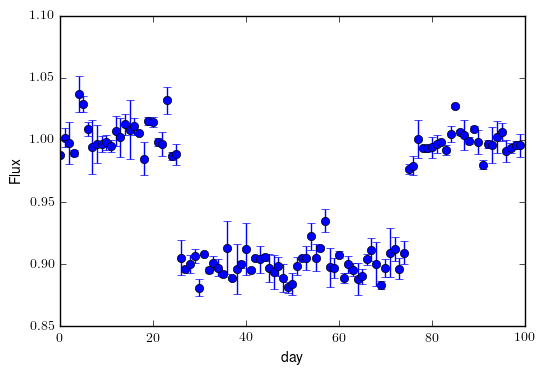

In [159]:
# Instantiate a lightcurve
lc = LightCurve(time, flux, unc, units='day')
lc.plot()

## Fit a model to the light curve data
Now that we have our light curve data loaded, let's fit a model to it.

We can create an arbitrary model with the `ExoCTK.lightcurve_fitting.models.Model()` class by passing it a `time` axis and `flux` axis.

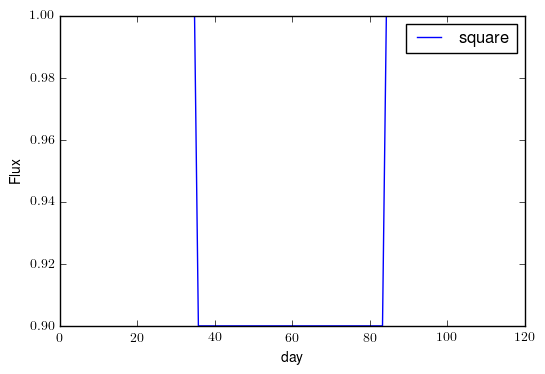

In [160]:
# Create a model
my_model = Model(time=np.linspace(10, 108, 100), flux=raw_flux, name='square')
my_model.plot()

Or we can use one of the many supported models by calling them directly. We'll create a simple linear model using the `PolynomialModel` class.

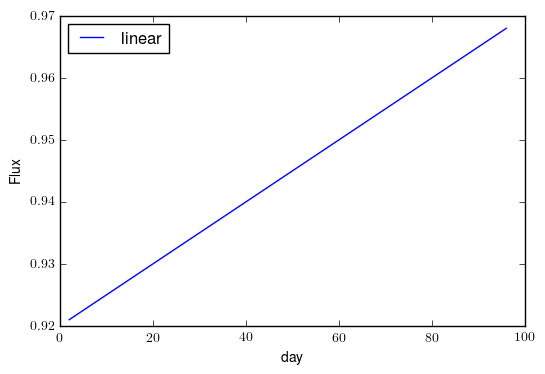

In [161]:
# Create a PolynomialModel instance with coeffs [c1, c0]
lin_model = PolynomialModel(np.linspace(2, 96, 100), [0.0005,0.92], name='linear')
lin_model.plot()

An arbitrary number of models can then be multiplied to produce a final model to fit to the data.

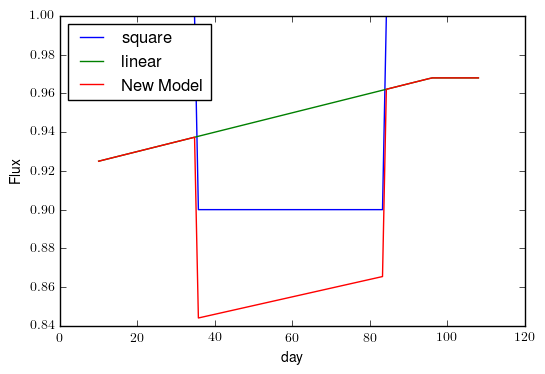

In [162]:
# Make the new model by multiplying the components
model = my_model*lin_model

# Plot them all
my_model.plot()
lin_model.plot()
model.plot()

Now we can create a model to fit to our light curve data.

In [165]:
# Fit the model to the data
lc.fit(my_model, fitter='lmfit')

'lmfit'